In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [85]:
euro = pd.read_csv('курс евро.csv') # dollar price in rubles dataset

In [86]:
"""
nominal represents amount of dollars
data represents date
curs represents how mutch dollar costs
cdx represents currency (US dollars)
"""

euro.head() 

,nominal,data,curs,cdx
0,1,9/2/2023,96.3411,Доллар США
1,1,9/1/2023,96.3344,Доллар США
2,1,8/31/2023,95.9283,Доллар США
3,1,8/30/2023,95.7070,Доллар США
4,1,8/29/2023,95.4717,Доллар США


In [87]:
euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740 entries, 0 to 4739
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nominal  4740 non-null   int64  
 1   data     4740 non-null   object 
 2   curs     4740 non-null   float64
 3   cdx      4740 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 148.2+ KB


In [88]:
euro.data = pd.to_datetime(euro.data)            #turning string in datetime
years = euro.data.apply(lambda x: str(x.year)).drop_duplicates().to_numpy()[::-1] #getting years for fancy x_label


## Plotting Ruble's exchange rate

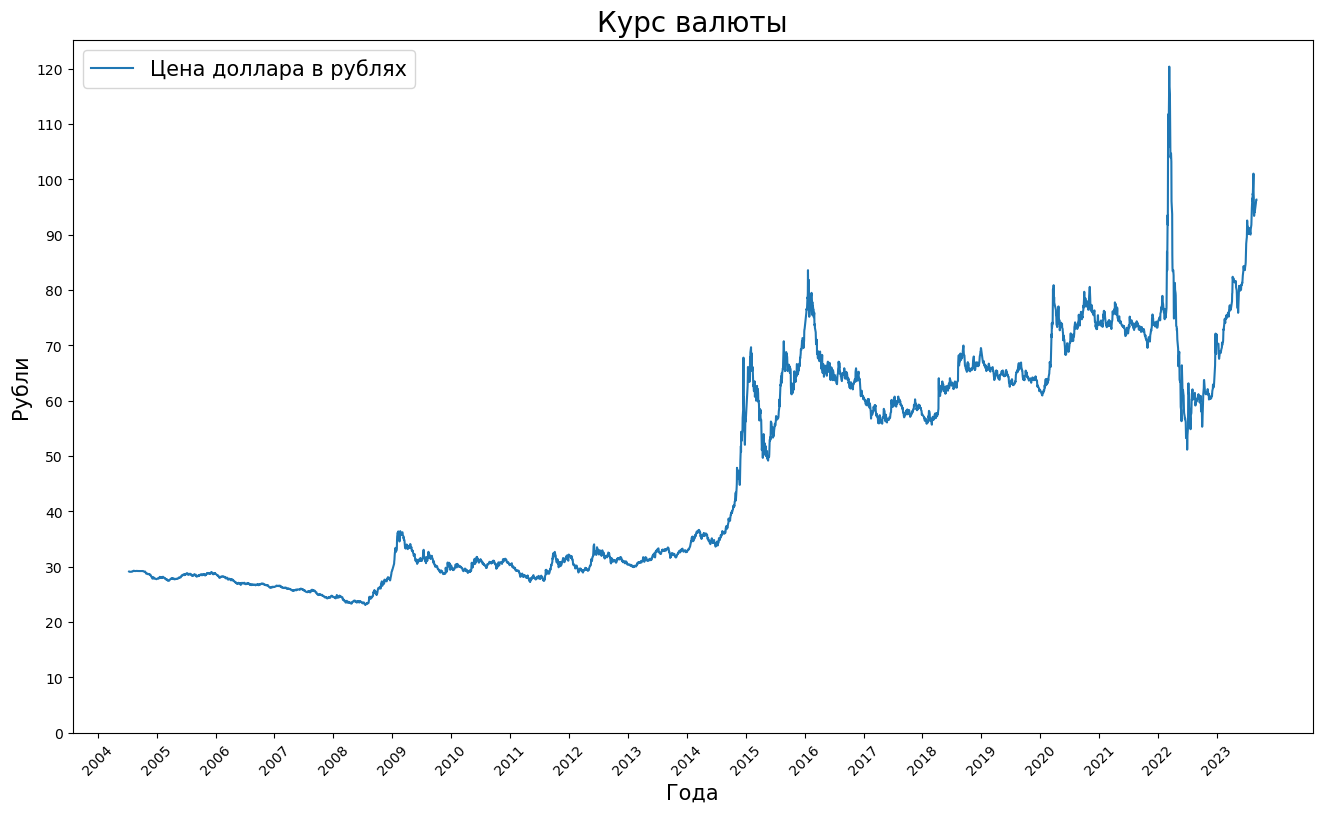

In [89]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.set_title('Курс валюты', fontsize = 20)
ax.plot(euro.data, euro.curs, label = 'Цена доллара в рублях')
ax.legend(fontsize = 15)
ax.set_yticks(range(0, 121, 10))
ax.set_xticks(ticks = years, labels = years,  rotation = 45)
ax.set_xlabel('Года', fontsize = 15)
ax.set_ylabel('Рубли', fontsize = 15)

plt.show()

The lowest exchange rate of the ruble

In [90]:
euro.sort_values(by = 'curs', ascending = False).iloc[0]

nominal                      1
data       2022-03-11 00:00:00
curs                  120.3785
cdx                 Доллар США
Name: 368, dtype: object

The highest exchange rate of the ruble


In [91]:
euro.sort_values(by = 'curs', ascending = True).iloc[0]

nominal                      1
data       2008-07-16 00:00:00
curs                   23.1255
cdx                 Доллар США
Name: 3744, dtype: object

Creation and training of linear regressin model

In [92]:
lm = linear_model.LinearRegression()

In [93]:
"""
here I want to make 3 separate columns of date column representing each year month and day of ruble's exchange rate
"""

euro['year'] =  euro.data.apply( lambda x: x.year )
euro['month'] =  euro.data.apply( lambda x: x.month )
euro['day'] =  euro.data.apply( lambda x: x.day )
euro = euro.sort_values(by = ['year', 'month', 'day'], ascending = True)[['year', 'month', 'day', 'curs']]

euro.head()

,year,month,day,curs
4739,2004,7,14,29.1248
4738,2004,7,15,29.1037
4737,2004,7,16,29.0770
4736,2004,7,17,29.0908
4735,2004,7,20,29.0805


In [94]:
x_train, x_test, y_train, y_test = train_test_split(euro[['year', 'month', 'day']], euro.curs, test_size = 0.05, random_state = 11) #47 48 12 13- seeds

In [95]:
lm.fit(x_train, y_train)

LinearRegression()

In [96]:
lm.coef_

array([ 3.23440691,  0.14369526, -0.00695648])

In [97]:
pred = lm.predict(x_test)

In [98]:
print(pred.shape, y_test.shape)

(237,) (237,)


In [99]:
# comparison of predictions
for i in range(y_test.size):
    print(y_test.to_numpy()[i], pred[i])
    if i == 10: break

80.8815 66.87210146876805
28.2367 16.229414098539564
63.521 64.17073670880382
28.3698 19.273821221449907
26.3473 24.778507115472166
68.8376 67.2962307635953
28.0685 38.00113443403552
49.322 48.580439675512025
29.1151 16.18310957034828
28.7896 19.4916469311147
55.8453 57.29866303694416


Plotting linear regression in scatter

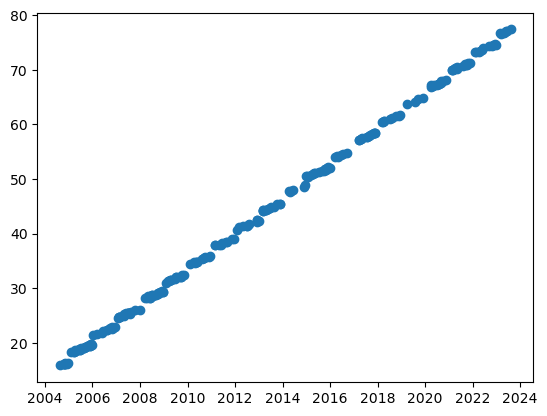

<Figure size 2400x600 with 0 Axes>

In [100]:
plt.scatter(x_test.apply(lambda x: datetime(x.year, x.month, x.day), axis = 1), pred)
plt.figure(figsize = (24,6))
plt.show()

Plotting linear regression in plot


In [101]:
to_plot = pd.DataFrame( x_test.apply(lambda x: datetime(x.year, x.month, x.day), axis = 1), columns = ['dates'])
to_plot['predic'] = pred
to_plot = to_plot.sort_values(by = 'dates')
to_plot = to_plot.sort_values(by = 'dates')


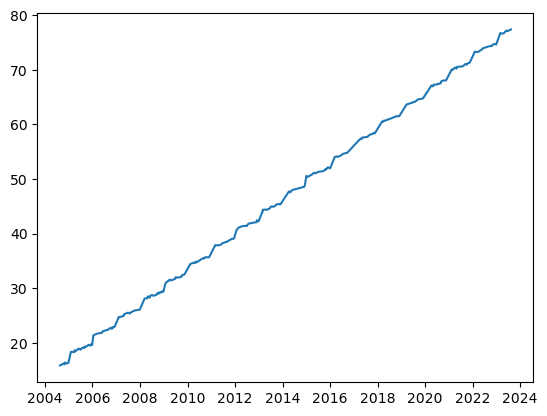

In [102]:
plt.plot(to_plot.dates, to_plot.predic)

In [103]:
no_days_curs = euro.groupby(['year', 'month']).curs.max().reset_index()

In [104]:
no_days_curs.head()

,year,month,curs
0,2004,7,29.1248
1,2004,8,29.2760
2,2004,9,29.2591
3,2004,10,29.2224
4,2004,11,28.7811
